In [82]:
#Import dataset and library
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
train_file_path = "train - train.csv"
traindf = pd.read_csv(train_file_path)
test_file_path = "test - test.csv"
testdf = pd.read_csv(test_file_path)

In [84]:
traindf.shape

(83293, 33)

In [85]:
testdf.shape

(35698, 32)

In [86]:
traindf.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [87]:
testdf.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0.0,...,79.0,NaN,0,Transient,89.38,0,0,Canceled,2019-05-31,83293
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0.0,...,37.0,NaN,0,Transient-Party,70.00,0,0,Check-Out,2017-11-26,83294
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0.0,...,168.0,NaN,0,Transient,80.10,0,0,Check-Out,2019-07-29,83295
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0.0,...,240.0,NaN,0,Transient,66.00,0,1,Check-Out,2018-01-03,83296
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0.0,...,9.0,NaN,0,Transient,126.00,0,1,Canceled,2019-01-02,83297


In [88]:
#Data Cleaning
##Train data
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [89]:
traincolnames = traindf.columns

trainNA_pct = []

for col in traincolnames:
    
    trainNA_pct.append([traindf[col].isna().sum(), round((traindf[col].isna().sum() / traindf.shape[0]) * 100, 2), traindf[col].nunique(), traindf[col].unique()[:5]])
    
trainNA_pct = pd.DataFrame(trainNA_pct, index = [traincolnames], columns = ['NA Counts', 'NA Percentage', 'Unique Value Count', "Sample"]).reset_index()

trainNA_pct.rename(columns={"level_0": "Feature"}, inplace=True)

trainNA_pct

,Feature,NA Counts,NA Percentage,Unique Value Count,Sample
0,hotel,0,0.00,64,"[Crystal Cove, Barbados Barbados, Greensboro C..."
1,is_canceled,0,0.00,2,"[0, 1]"
2,lead_time,0,0.00,477,"[8, 524, 175, 0, 33]"
3,arrival_date_year,0,0.00,3,"[2019, 2018, 2017]"
4,arrival_date_month,0,0.00,12,"[January, December, May, October, September]"
5,arrival_date_week_number,0,0.00,53,"[2, 51, 20, 43, 39]"
6,arrival_date_day_of_month,0,0.00,31,"[10, 15, 19, 17, 26]"
7,stays_in_weekend_nights,0,0.00,17,"[0, 1, 2, 4, 3]"
8,stays_in_week_nights,0,0.00,34,"[4, 2, 0, 3, 6]"
9,adults,0,0.00,14,"[2, 1, 3, 0, 4]"


In [90]:
#Drop variabel 'company' karena NA > 50%
traindf = traindf.drop(columns='company')

In [91]:
traindf.shape

(83293, 32)

In [92]:
#Fill NA
traindf['children'] = traindf['children'].fillna(traindf['children'].median())
traindf['children'].isnull().sum()

0

In [93]:
traindf['country'].mode()[0]
traindf['country'] = traindf['country'].fillna(traindf['country'].mode()[0])
traindf['country'].isnull().sum()

0

In [94]:
filtertrain = (traindf.children == 0) & (traindf.adults == 0) & (traindf.babies == 0)
traindf[filtertrain]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
1377,Sheraton Grand Rio Hotel & Resort Rio de Janei...,0,37,2018,November,47,17,1,3,0,...,No Deposit,9.0,0,Transient,97.40,1,1,Check-Out,2018-11-21,1378
1726,Protea Hotel by Marriott Cape Town Sea Point C...,0,31,2018,December,53,27,2,8,0,...,No Deposit,NaN,0,Transient,28.00,1,0,Check-Out,2019-01-06,1727
1991,Sheraton Mexico City Maria Isabel Hotel Mexico...,0,0,2019,February,9,27,0,0,0,...,No Deposit,85.0,0,Transient,0.00,0,0,Check-Out,2019-02-27,1992
2036,Baton Rouge Acadian Centre/LSU Area Courtyard ...,0,0,2017,August,33,10,9,20,0,...,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2017-09-08,2037
2401,"Orlando Airport Courtyard Orlando, FL",0,0,2017,December,52,24,0,0,0,...,No Deposit,28.0,0,Transient,0.00,0,1,Check-Out,2017-12-24,2402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80658,Courtyard by Marriott Toulouse Airport Toulous...,1,1,2017,September,37,6,2,0,0,...,No Deposit,1.0,0,Transient-Party,0.00,0,0,Canceled,2017-09-05,80659
81486,Courtyard by Marriott Toulouse Airport Toulous...,1,0,2019,August,32,11,0,0,0,...,No Deposit,NaN,0,Transient,0.00,0,0,Canceled,2019-08-11,81487
82012,Protea Hotel Fire & Ice! by Marriott Cape Town...,1,173,2018,April,15,8,2,3,0,...,No Deposit,21.0,0,Transient-Party,0.00,0,0,Canceled,2018-03-29,82013
82681,"Tamarind, Barbados Barbados",0,177,2018,December,53,30,2,5,0,...,No Deposit,NaN,0,Transient,1.29,0,2,Check-Out,2019-01-06,82682


In [95]:
traindf = traindf[~filtertrain]
traindf.shape

(83166, 32)

In [96]:
traindf['agent'] = traindf['agent'].fillna(traindf['agent'].median())
traindf['agent'].isnull().sum()

0

In [97]:
traindf.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [98]:
##test data
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35698 entries, 0 to 35697
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           35698 non-null  object 
 1   lead_time                       35698 non-null  int64  
 2   arrival_date_year               35698 non-null  int64  
 3   arrival_date_month              35698 non-null  object 
 4   arrival_date_week_number        35698 non-null  int64  
 5   arrival_date_day_of_month       35698 non-null  int64  
 6   stays_in_weekend_nights         35698 non-null  int64  
 7   stays_in_week_nights            35698 non-null  int64  
 8   adults                          35698 non-null  int64  
 9   children                        35697 non-null  float64
 10  babies                          35698 non-null  int64  
 11  meal                            35698 non-null  object 
 12  country                         

In [99]:
testcolnames = testdf.columns

testNA_pct = []

for col in testcolnames:
    
    testNA_pct.append([testdf[col].isna().sum(), round((testdf[col].isna().sum() / testdf.shape[0]) * 100, 2), testdf[col].nunique(), testdf[col].unique()[:5]])
    
testNA_pct = pd.DataFrame(testNA_pct, index = [testcolnames], columns = ['NA Counts', 'NA Percentage', 'Unique Value Count', "Sample"]).reset_index()

testNA_pct.rename(columns={"level_0": "Feature"}, inplace=True)

testNA_pct

,Feature,NA Counts,NA Percentage,Unique Value Count,Sample
0,hotel,0,0.00,64,[Fort Worth University Drive Courtyard Fort Wo...
1,lead_time,0,0.00,464,"[46, 98, 171, 2, 167]"
2,arrival_date_year,0,0.00,3,"[2019, 2017, 2018]"
3,arrival_date_month,0,0.00,12,"[July, November, January, May, March]"
4,arrival_date_week_number,0,0.00,53,"[27, 48, 30, 1, 20]"
5,arrival_date_day_of_month,0,0.00,31,"[3, 23, 28, 2, 14]"
6,stays_in_weekend_nights,0,0.00,14,"[1, 0, 2, 4, 3]"
7,stays_in_week_nights,0,0.00,26,"[0, 2, 1, 3, 4]"
8,adults,0,0.00,8,"[2, 1, 3, 0, 4]"
9,children,1,0.00,4,"[0.0, 1.0, 2.0, 3.0, nan]"


In [100]:
testdf = testdf.drop(columns='company')

In [101]:
testdf['children'] = testdf['children'].fillna(testdf['children'].median())
testdf['children'].isnull().sum()

0

In [102]:
testdf['country'].mode()[0]
testdf['country'] = testdf['country'].fillna(testdf['country'].mode()[0])
testdf['country'].isnull().sum()

0

In [103]:
testdf['agent'] = testdf['agent'].fillna(testdf['agent'].median())
testdf['agent'].isnull().sum()

0

In [104]:
testdf.shape

(35698, 31)

In [105]:
testdf.isnull().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [106]:
filtertest = (testdf.children == 0) & (testdf.adults == 0) & (testdf.babies == 0)
testdf[filtertest]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
1898,"Indianapolis Airport Courtyard Indianapolis, IN",1,2019,January,4,25,0,2,0,0.0,...,No Deposit,14.0,0,Transient,0.00,0,0,Canceled,2019-01-25,85191
2442,Sheraton Grand Rio Hotel & Resort Rio de Janei...,0,2018,November,45,1,0,0,0,0.0,...,No Deposit,37.0,0,Transient,0.00,0,0,Check-Out,2018-11-01,85735
2536,"Renaissance Hamburg Hotel Hamburg, Germany",0,2018,December,50,6,0,0,0,0.0,...,No Deposit,14.0,0,Transient,0.00,0,0,Canceled,2018-12-06,85829
2679,"W New York – Times Square New York, NY",0,2019,January,2,9,0,0,0,0.0,...,No Deposit,9.0,0,Transient,0.00,0,2,Check-Out,2019-01-09,85972
5576,Cape Town Marriott Hotel Crystal Towers Cape T...,9,2018,March,12,16,2,6,0,0.0,...,No Deposit,29.0,0,Transient,3.38,1,0,Check-Out,2018-03-24,88869
6231,"Protea Hotel by Marriott Midrand Midrand, Sout...",48,2018,February,9,21,2,4,0,0.0,...,No Deposit,14.0,0,Transient-Party,56.27,0,0,Check-Out,2018-02-27,89524
6738,"W Barcelona Barcelona, Spain",14,2018,November,47,18,2,3,0,0.0,...,No Deposit,25.0,0,Transient-Party,0.00,0,0,Check-Out,2018-11-23,90031
6927,"Hotel Alfonso XIII, a Luxury Collection Hotel,...",244,2018,July,28,6,2,4,0,0.0,...,No Deposit,19.0,0,Transient,0.00,0,0,Canceled,2017-11-05,90220
7387,"Des Moines West/Clive Courtyard Clive, IA",2,2019,July,28,15,2,5,0,0.0,...,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2019-07-22,90680
8140,"Indianapolis Airport Courtyard Indianapolis, IN",125,2019,January,1,1,4,10,0,0.0,...,No Deposit,9.0,0,Transient,27.69,0,2,Check-Out,2019-01-15,91433


In [107]:
testdf = testdf[~filtertest]
testdf.shape

(35645, 31)

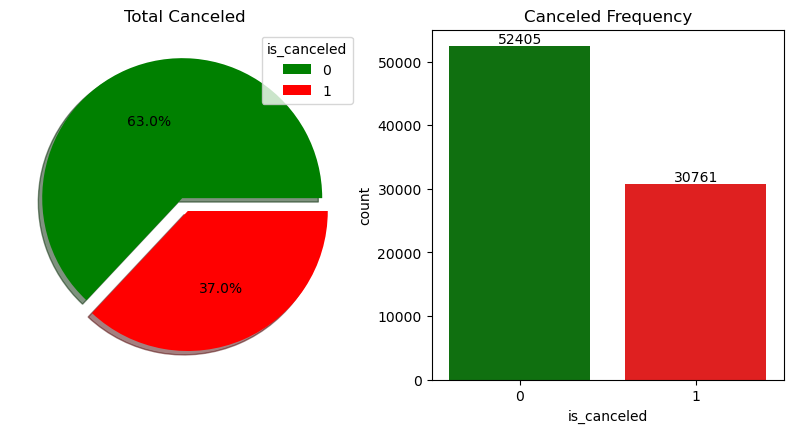

In [108]:
#EDA
data_cancel = traindf['is_canceled'].value_counts()
fig = plt.figure(figsize=(10, 10))

explode = (0.05, 0.05)
ax1 = fig.add_subplot(2, 2, 1)
ax1.pie(data_cancel.values, explode=explode, shadow=True, autopct='%1.1f%%', colors=['green', 'red'])
ax1.set_title("Total Canceled")
ax1.legend(data_cancel.keys(), title="is_canceled")

ax2 = fig.add_subplot(2, 2, 2)
vis2 = sns.countplot(x=traindf['is_canceled'], ax=ax2, palette=['green', 'red'], linewidth=1)
ax2.set_title("Canceled Frequency")
for item in vis2.get_xticklabels():
    item.set_rotation(0)
for i in vis2.containers:
    vis2.bar_label(i,)

plt.show()

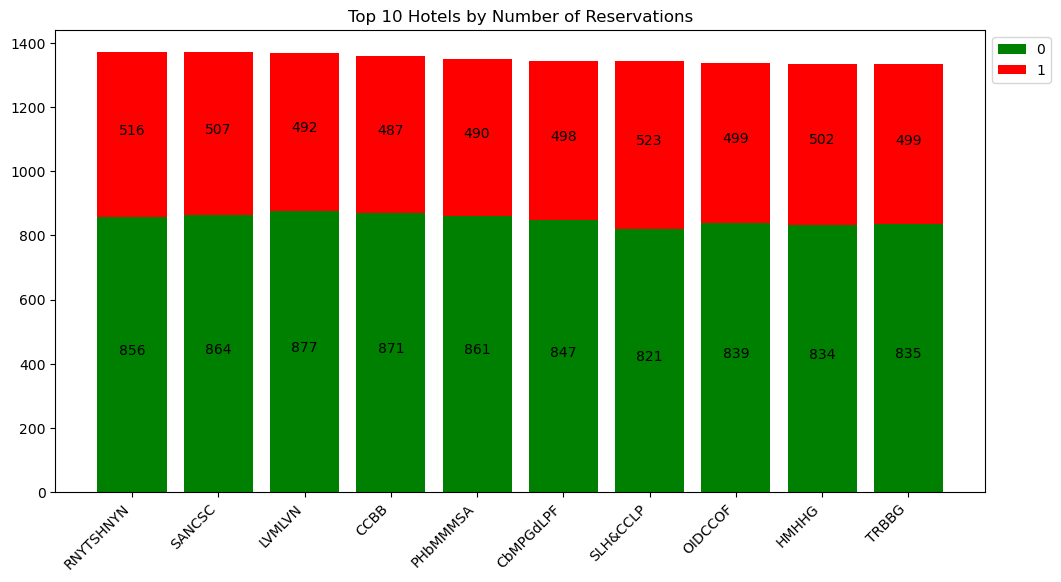

In [109]:
data_hotel = pd.DataFrame(traindf['hotel'].value_counts())

cancel_counts = pd.DataFrame(traindf.groupby("hotel")["is_canceled"].value_counts().unstack(fill_value=0))

data_hotel = pd.concat([data_hotel, cancel_counts], axis=1, ignore_index=True).reset_index()
data_hotel.columns = ['Hotel','Jumlah','0','1']

def ambil_inisial(nama):
    inisial = ''
    nama_split = nama.split()
    for kata in nama_split:
        inisial += kata[0]
    return inisial

data_hotel['Inisial'] = data_hotel['Hotel'].apply(lambda x: ambil_inisial(x))

top_hotel = data_hotel.nlargest(10, 'Jumlah')

fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar char
ax.bar(top_hotel['Inisial'], top_hotel['0'], color = 'green', label = "0")
ax.bar(top_hotel['Inisial'], top_hotel['1'], color = 'red', bottom = top_hotel['0'], label = "1")

# Labels
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = '#000000', size = 10)

plt.xticks(rotation=45, ha="right")
ax.set_title("Top 10 Hotels by Number of Reservations")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.show()

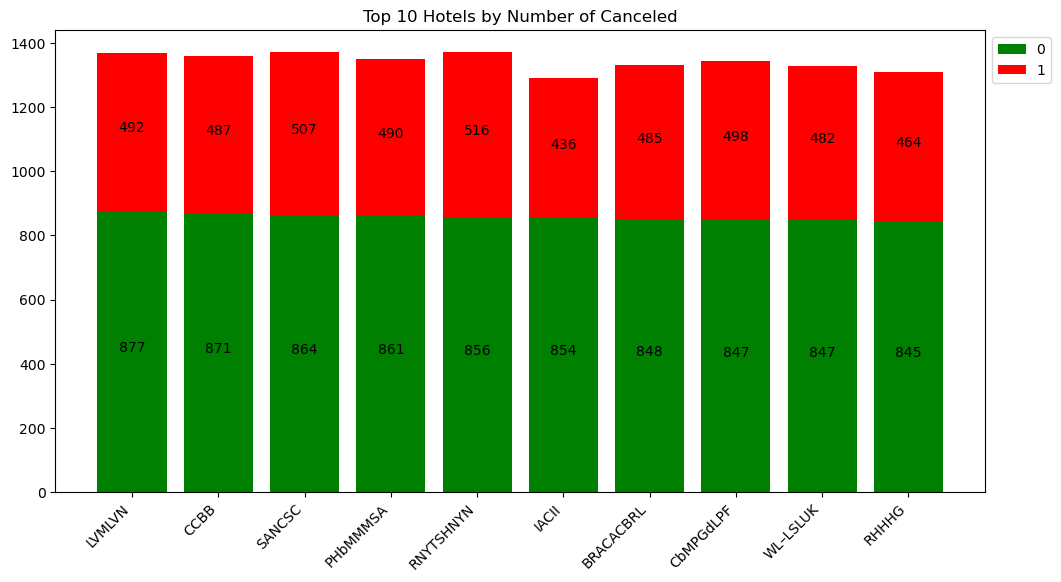

In [110]:
data_hotel = pd.DataFrame(traindf['hotel'].value_counts())

cancel_counts = pd.DataFrame(traindf.groupby("hotel")["is_canceled"].value_counts().unstack(fill_value=0))

data_hotel = pd.concat([data_hotel, cancel_counts], axis=1, ignore_index=True).reset_index()
data_hotel.columns = ['Hotel','Jumlah','0','1']

def ambil_inisial(nama):
    inisial = ''
    nama_split = nama.split()
    for kata in nama_split:
        inisial += kata[0]
    return inisial

data_hotel['Inisial'] = data_hotel['Hotel'].apply(lambda x: ambil_inisial(x))

top_hotel = data_hotel.nlargest(10, '0')

fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar char
ax.bar(top_hotel['Inisial'], top_hotel['0'], color = 'green', label = "0")
ax.bar(top_hotel['Inisial'], top_hotel['1'], color = 'red', bottom = top_hotel['0'], label = "1")

# Labels
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = '#000000', size = 10)

plt.xticks(rotation=45, ha="right")
ax.set_title("Top 10 Hotels by Number of Canceled")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.show()

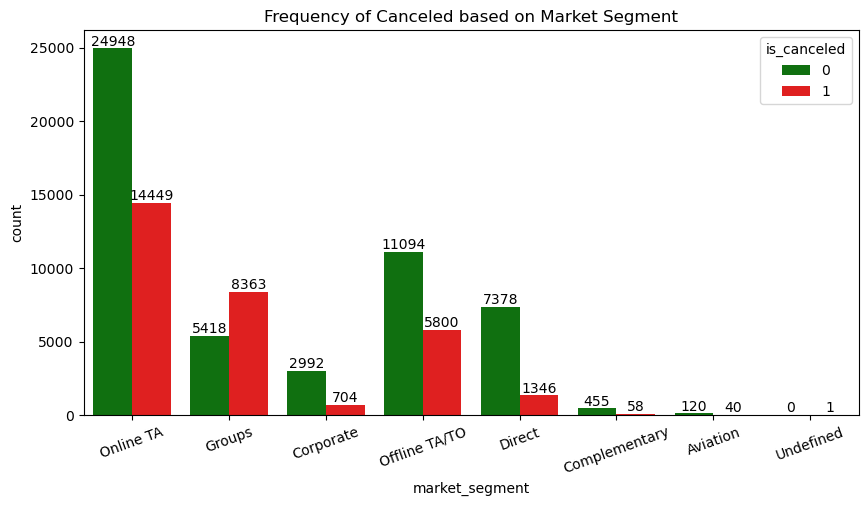

In [111]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
vis = sns.countplot(x='market_segment', hue='is_canceled', data=traindf, palette=['green', 'red'], ax=ax)
ax.set_title('Frequency of Canceled based on Market Segment')
for item in vis.get_xticklabels():
    item.set_rotation(20)
for i in vis.containers:
    vis.bar_label(i,)

plt.show()

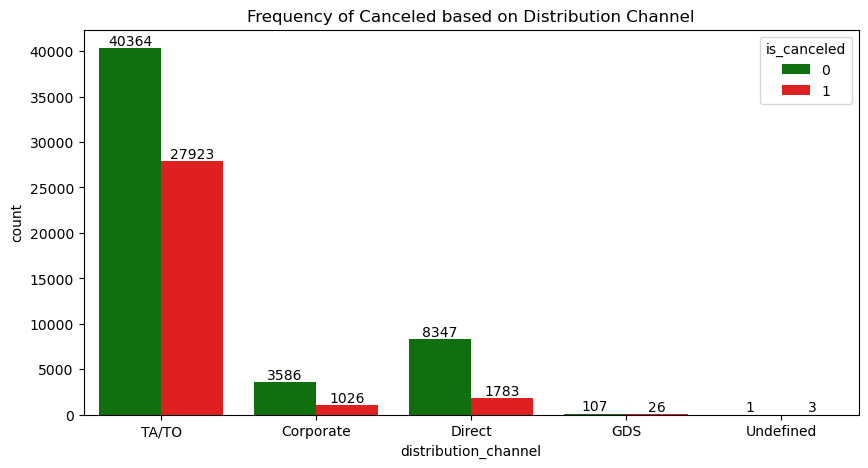

In [112]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
vis = sns.countplot(x='distribution_channel', hue='is_canceled', data=traindf, palette=['green', 'red'], ax=ax)
ax.set_title('Frequency of Canceled based on Distribution Channel')
for item in vis.get_xticklabels():
    item.set_rotation(0)
for i in vis.containers:
    vis.bar_label(i,)

plt.show()

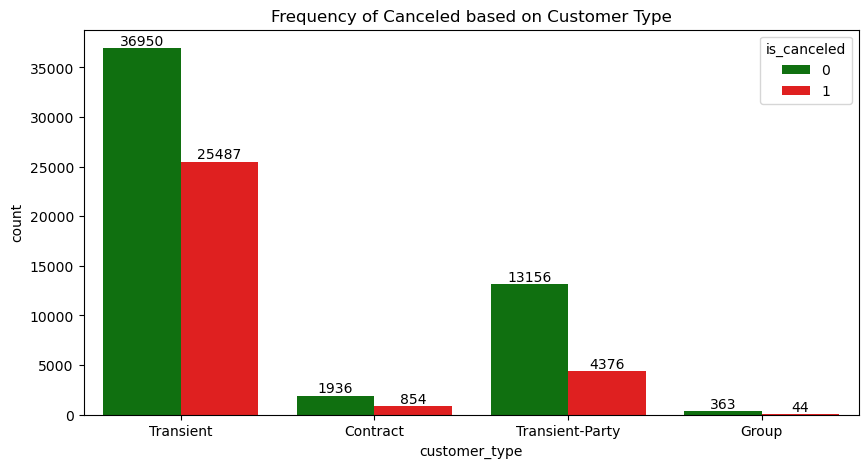

In [113]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
vis = sns.countplot(x='customer_type', hue='is_canceled', data=traindf, palette=['green', 'red'], ax=ax)
ax.set_title('Frequency of Canceled based on Customer Type')
for item in vis.get_xticklabels():
    item.set_rotation(0)
for i in vis.containers:
    vis.bar_label(i,)

plt.show()

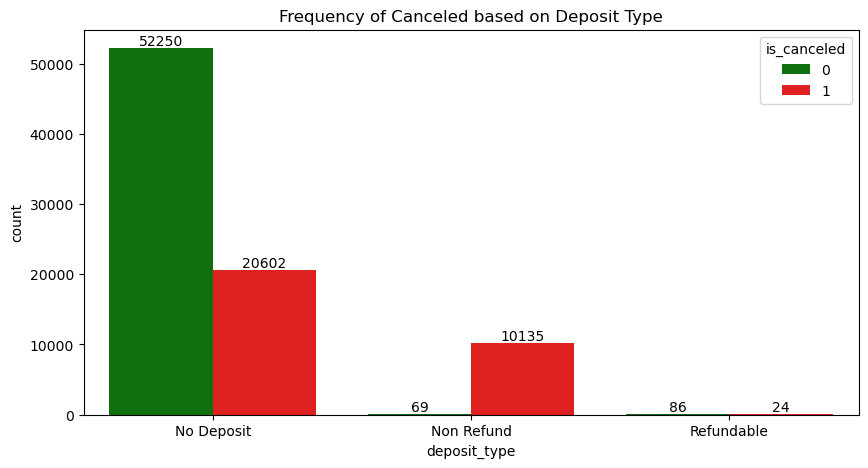

In [114]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
vis = sns.countplot(x='deposit_type', hue='is_canceled', data=traindf, palette=['green', 'red'], ax=ax)
ax.set_title('Frequency of Canceled based on Deposit Type')
for item in vis.get_xticklabels():
    item.set_rotation(0)
for i in vis.containers:
    vis.bar_label(i,)

plt.show()

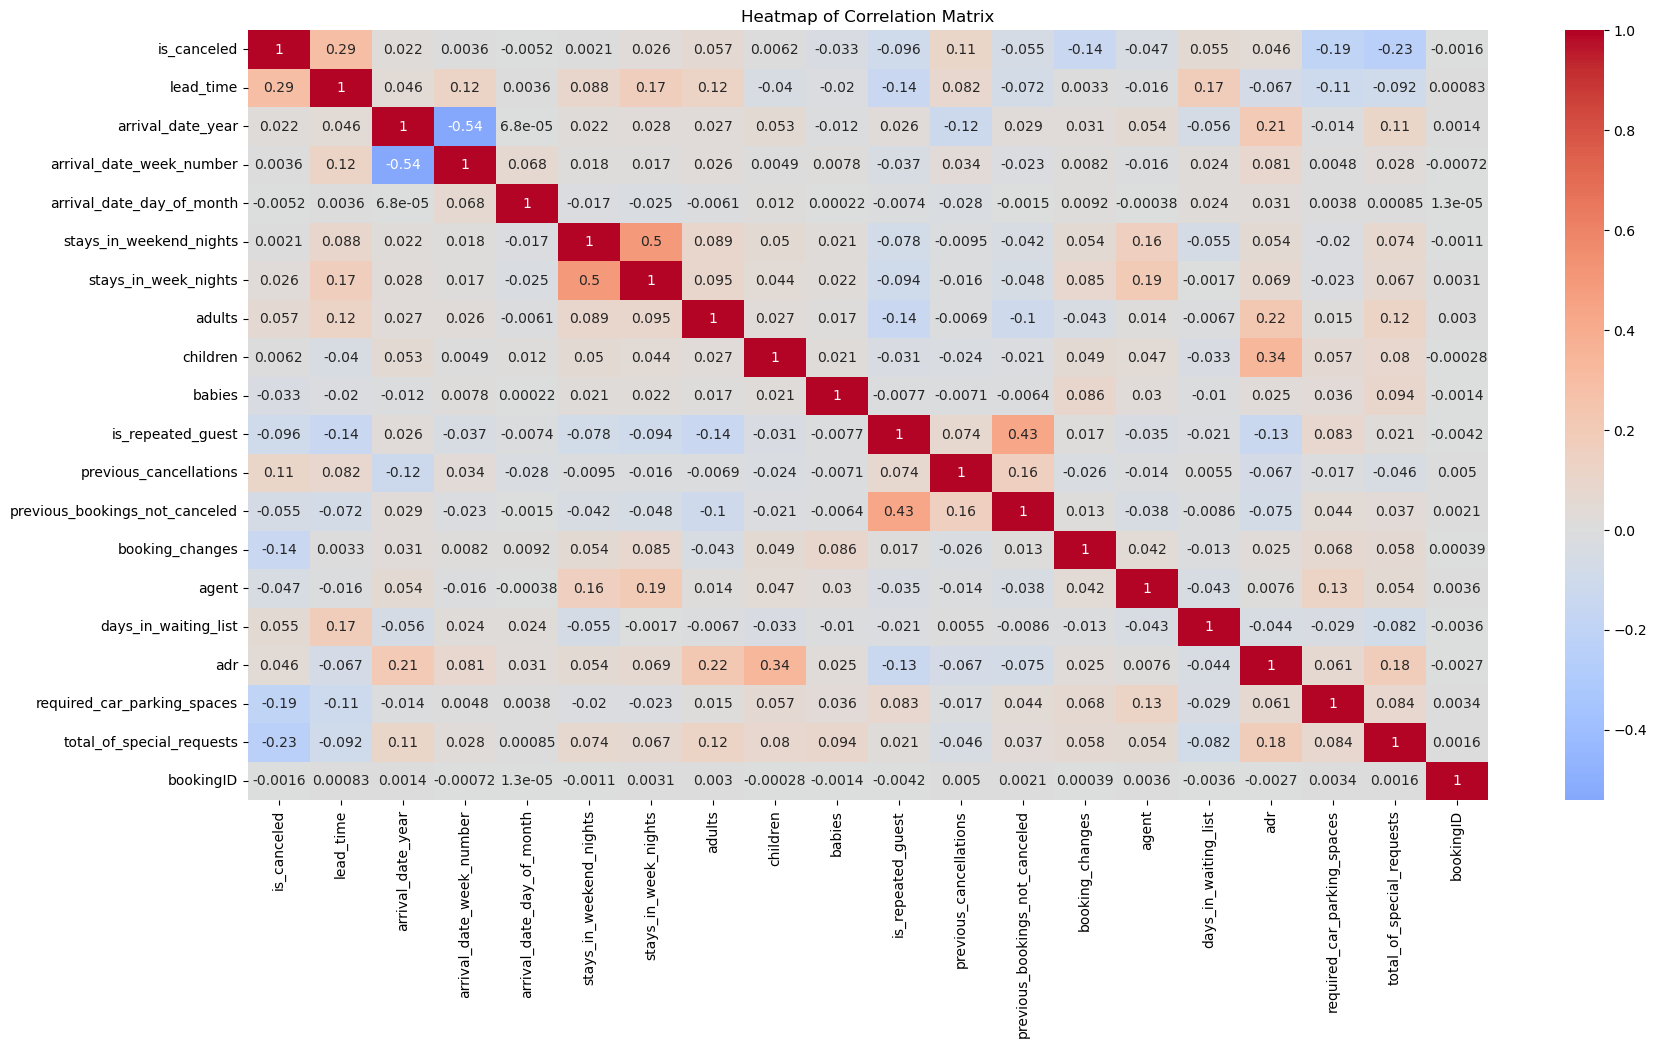

In [115]:
#Feature Engineering
numeric_columns = traindf.select_dtypes(include=[int, float]).columns

correlation_matrix = traindf[numeric_columns].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [116]:
correlation = traindf[numeric_columns].corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.290665
total_of_special_requests         0.234313
required_car_parking_spaces       0.193347
booking_changes                   0.143684
previous_cancellations            0.106478
is_repeated_guest                 0.096101
adults                            0.057389
previous_bookings_not_canceled    0.055492
days_in_waiting_list              0.054893
agent                             0.046965
adr                               0.045741
babies                            0.033248
stays_in_week_nights              0.026013
arrival_date_year                 0.022476
children                          0.006240
arrival_date_day_of_month         0.005183
arrival_date_week_number          0.003608
stays_in_weekend_nights           0.002069
bookingID                         0.001627
Name: is_canceled, dtype: float64

In [139]:
X = traindf[['lead_time','total_of_special_requests','required_car_parking_spaces','booking_changes','previous_cancellations']]
y = traindf['is_canceled']

X

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations
0,8,0,0,0,0
1,524,0,0,0,0
2,175,0,0,0,0
3,0,0,0,0,0
4,33,1,0,0,0
...,...,...,...,...,...
83288,4,1,1,0,0
83289,30,2,0,0,0
83290,165,1,0,0,0
83291,180,1,0,0,0


In [140]:
y

0        0
1        1
2        1
3        0
4        1
        ..
83288    0
83289    0
83290    0
83291    0
83292    0
Name: is_canceled, Length: 83166, dtype: int64

In [141]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xdata_norm = pd.DataFrame(scaler.fit_transform(X))
Xdata_norm.columns = ['lead_time','total_of_special_requests','required_car_parking_spaces','booking_changes','previous_cancellations']

Xdata_norm

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations
0,0.010855,0.0,0.000,0.000000,0.0
1,0.710991,0.0,0.000,0.000000,0.0
2,0.237449,0.0,0.000,0.000000,0.0
3,0.000000,0.0,0.000,0.000000,0.0
4,0.044776,0.2,0.000,0.000000,0.0
...,...,...,...,...,...
83161,0.005427,0.2,0.125,0.000000,0.0
83162,0.040706,0.4,0.000,0.000000,0.0
83163,0.223881,0.2,0.000,0.000000,0.0
83164,0.244233,0.2,0.000,0.000000,0.0


In [142]:
X_train, X_test, y_train, y_test = train_test_split(Xdata_norm, y, test_size=0.2, random_state=6, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66532, 5), (16634, 5), (66532,), (16634,))

In [151]:
#Modelling
logistik = LogisticRegression(random_state = 5, max_iter=500, solver="sag", class_weight="balanced", n_jobs=-1) 
logistik.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   random_state=5, solver='sag')

In [152]:
logistik.score(X_train, y_train), logistik.score(X_test, y_test)

(0.706877893344556, 0.7099915835036672)

In [153]:
#Evaluation
y_pred_proba = logistik.predict_proba(X_test)
y_pred = logistik.predict(X_test)

In [154]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred_proba[:, 1])
F1 = f1_score(y_test, y_pred)

In [155]:
print('Accuracy = ',round(accuracy*100,2),'%')
print('Recall = ',round(recall*100,2),'%')
print('Precision =',round(precision*100,2),'%')
print('AUC =',round(AUC,2))
print('F1-score = ',round(F1*100,2),'%')

Accuracy =  71.0 %
Recall =  71.1 %
Precision = 58.95 %
AUC = 0.77
F1-score =  64.46 %


In [156]:
report = classification_report(y_true = y_test, y_pred = logistik.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.81      0.71      0.76     10482
           1       0.59      0.71      0.64      6152

    accuracy                           0.71     16634
   macro avg       0.70      0.71      0.70     16634
weighted avg       0.73      0.71      0.71     16634



In [157]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = logistik.predict(X_test))

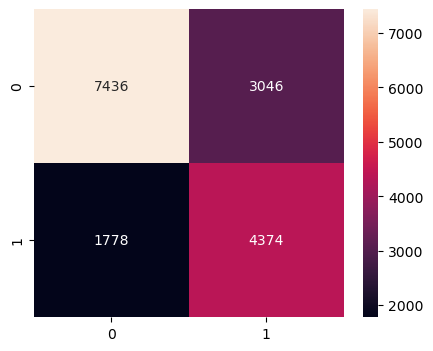

In [158]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="g")
plt.show()